# Group Members:
- Akhona Dlamini 22363064
- Kwanele Sishi 22315536
- Sicelo Thusi 21907372

In [39]:
# import a submodule from matplotlib module that is going to help us in plotting the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

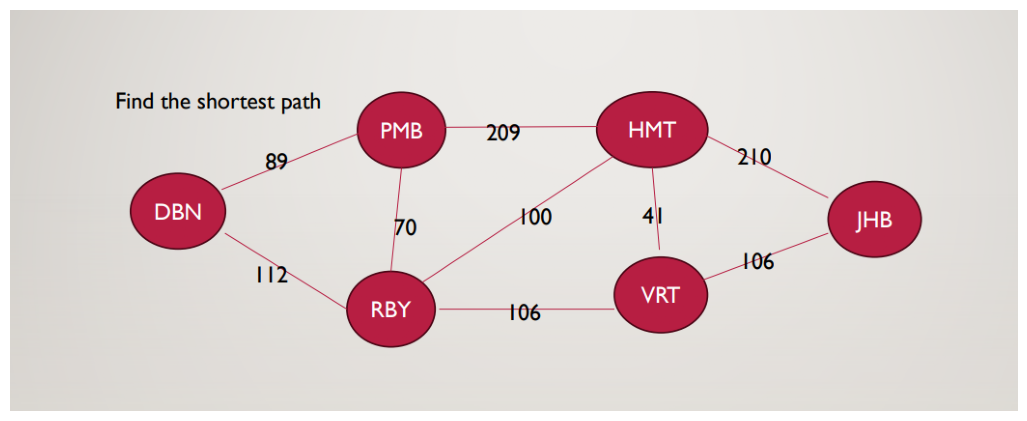

In [45]:
#imread - is a function provided by the image class to display the image

plt.figure(figsize=(13,16))
plt.axis('off')#remove the y and x axis
img = mpimg.imread("C:\\Users\\Student\\Pictures\\Screenshots\\ShortestPath.png")
imgplot = plt.imshow(img)
plt.show()

# Find the shortest path from 'DBN' to 'JHB'

Step 1: We identify the starting vertex 'DBN' and the destination vertex 'JHB'.<br>
Step 2: Our starting vertex 'DBN' is marked as 0 while all the other remaining vertices are marked as infinite.<br>
Step 3: Find the adjacent nodes
- Find edges connected to 'DBN' which are 'PMB' and 'RBY'
- DBN = {'PMB','RBY'} <br>
Step 4: Find cost of each neighbor/connected vertex:
- Cost of PMB = Cost of DBN + Distance from DBN to PMB
              = 0 + 89
              = 89
- Cost of RBY = Cost of DBN + Distance from DBN to RBY
              = 0 + 112
              = 112 <br>
Step 5: Find the minimum neighbor using greedy approach:
- Minimum between {'PMB','RBY'} = {89, 112} is 'PMB'
- Ignore the maximum cost<br>
Step 6: Mark the current node 'PMB' as visited.<br>
Step 7: Find adjacent nodes of 'PMB'.
- Find connected edges to 'PMB' which are PMB = {'HMT','RBY'}<br>
Step 8: Find the cost of each neighbor/connected vertex:
- Cost of RBY = Cost of PMB + Distance from PMB to RBY
              = 89 + 70
              = 159
- Cost of HMT = Cost of PMB + Distance from PMB to HMT
              = 89 + 209
              = 298 <br>
Step 9: Find the minimum neighbor using greedy approach:
- Remember RBY had a cost of 112, so we check if 159 > 112, this is true therefore we will take the smallest cost which is 112.
- Minimum between {'RBY','HMT'} = {159, 298} is 'RBY'<br>
Step 10: Mark the current node 'RBY' as visited.<br>
Step 11: Find the adjacent nodes of 'RBY'.
- Connected egdes to 'RBY' are {'HMT','VRT'}<br>
Step 12 : Find cost of each adjacent node:
- Cost of HMT = Cost of RBY + Distance from RBY to HMT
              = 112 + 100
              = 212
- Cost of VRT = Cost of RBY + Distance from RBY to VRT
              = 112 + 106
              = 208<br>
Step 13: Find the minimum neighbor using greedy approach:
- Remember 'HMT' had a cost already, 298 > 212, this is true therefore we will take the smallest cost which is 212.
- Minimum between {'HMT','VRT'} = {212, 208} is 'HMT'<br>
Step 14: Mark the current node 'HMT' as visited.<br>
Step 15: Find the adjacent nodes of 'HMT'
- Connected edges of 'HMT' are {'VRT','JHB'}.<br>
Step 16: Find the cost of each adjacent node to 'HMT'
- Cost of VRT = Cost of HMT + Distance from HMT to VRT
              = 212 + 41
              = 253
- Cost of JHB = Cost of HMT + Distance from HMT to JHB
              = 212 + 210
              = 422<br>
Step 17: Find the minimum neighbor using greedy approach.
- Remember 'VRT' had a cost already, 218 < 253, this is true therefore we will take the smallest cost which is 218.
- Minimum between {'VRT','JHB'} = {218, 422} is 218.<br>
Step 18: Mark the current node 'VRT' as visited.<br>
Step 19: Find the adjacent nodes 'VRT'
- Connected edge to 'VRT' is {'JHB'}.<br>
Step 20: Find cost of the adjacent node:
- Cost of JHB = Cost of VRT + Distance from VRT to JHB
              = 218 + 106
              = 324<br>
Step 21: Find the minimum neighbor using greedy approach.
- Remember 'JHB' had a cost already, 422 > 324, keep the smallest.<br>

Step 22: Mark 'JHB' as visited.<br>
Therefore the shortest part to 'JHB' from 'DBN' is DBN > RBY > VRT > JHB

# Using Dijkstra's Algorithm in Python

In [26]:
import heapq 

In [31]:
def dijkstra(graph, start):
    # Initialize distances with infinity and previous nodes with None
    distances = {node: float('infinity') for node in graph}
    previous_nodes = {node: None for node in graph}
    
    # Set the distance to the start node to 0
    distances[start] = 0

    # Priority queue to keep track of nodes to be processed
    priority_queue = [(0, start)]
    
    while priority_queue:
        # Extract the node with the smallest distance
        current_distance, current_node = heapq.heappop(priority_queue)

        # If the current distance is greater than the recorded distance, skip processing
        if current_distance > distances[current_node]:
            continue

        # Update the distances to the neighbors
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # If a shorter path is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node                
                heapq.heappush(priority_queue, (distance, neighbor))
               
    
    return distances, previous_nodes

In [32]:
def reconstruct_path(previous_nodes, start, end):
    path = []
    current_node = end

    while current_node is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]

    path.reverse()  # Reverse the path to get the correct order from start to end
    return path if path[0] == start else [] #Shortest Path taken to destination
   


In [46]:
# represanting a graph as dictionary where key is a node and value is another dictionary with key of adjecent node and value as the weight between them
graph = {
    'DBN': {'PMB': 89, 'RBY': 112},
    'PMB': {'DBN': 89, 'RBY': 70, 'HMT': 209},
    'RBY': {'DBN': 112, 'PMB': 70, 'HMT': 100, 'VRT':106},
    'HMT': {'PMB': 209, 'RBY': 100, 'VRT':41, 'JHB':210},
    'VRT': {'RBY': 106, 'HMT': 41, 'JHB':106},
    'JHB': {'HMT': 210, 'VRT':106}
}

In [37]:
start_node = 'DBN'
end_node = 'JHB'
distances, previous_nodes = dijkstra(graph, start_node)
path = reconstruct_path(previous_nodes, start_node, end_node)

print("Shortest distances:", distances)
print("Shortest path from {} to {}: {}".format(start_node, end_node, path))


Shortest distances: {'DBN': 0, 'PMB': 89, 'RBY': 112, 'HMT': 212, 'VRT': 218, 'JHB': 324}
Shortest path from DBN to JHB: ['DBN', 'RBY', 'VRT', 'JHB']
